In [1]:
import matplotlib.pyplot as plt
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import image
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.callbacks import CSVLogger
import pickle
import itertools

from sklearn.metrics import confusion_matrix


In [2]:
path=r"C:\\Users\\devma\\OneDrive\\Desktop\\Project\Latest\\"
X=pickle.load(open((path+"XM_1.pickle"),'rb'))
y=pickle.load(open((path+"yM_1.pickle"),'rb'))

X=X/255.0
y= np.asarray(y).astype('float32').reshape((-1,1))

In [3]:
X = X.astype('float32')
X /= 255
Y = np_utils.to_categorical(y, 4)

In [4]:
y.shape

(1710, 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_train)
y_test = np.array(y_train)

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [250, 250,3]),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 187500)            0         
                                                                 
 dense (Dense)               (None, 256)               48000256  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 4)                 132       
                                                                 
Total params: 48,043,620
Trainable params: 48,043,620
No

In [8]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [9]:
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 13)

Epoch 1/13
43/43 [==============================] - 9s 188ms/step - loss: 1.3230 - accuracy: 0.3604 - val_loss: 1.1490 - val_accuracy: 0.5322
Epoch 2/13
43/43 [==============================] - 8s 183ms/step - loss: 1.0727 - accuracy: 0.5117 - val_loss: 0.9521 - val_accuracy: 0.5687
Epoch 3/13
43/43 [==============================] - 8s 189ms/step - loss: 0.9208 - accuracy: 0.5841 - val_loss: 0.8361 - val_accuracy: 0.6140
Epoch 4/13
43/43 [==============================] - 8s 183ms/step - loss: 0.8634 - accuracy: 0.6301 - val_loss: 0.7729 - val_accuracy: 0.6747
Epoch 5/13
43/43 [==============================] - 8s 178ms/step - loss: 0.8392 - accuracy: 0.6272 - val_loss: 0.7502 - val_accuracy: 0.6711
Epoch 6/13
43/43 [==============================] - 7s 169ms/step - loss: 0.7081 - accuracy: 0.7076 - val_loss: 0.6514 - val_accuracy: 0.7186
Epoch 7/13
43/43 [==============================] - 7s 170ms/step - loss: 0.6787 - accuracy: 0.7251 - val_loss: 0.6710 - val_accuracy: 0.7573
Epoch 

In [10]:
model.evaluate(X_test, y_test)

43/43 [==============================] - 1s 27ms/step - loss: 0.3079 - accuracy: 0.8962


[0.3079141080379486, 0.8961988091468811]

In [11]:
train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 

In [12]:
y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)

y_preds[:100]

43/43 [==============================] - 1s 28ms/step


array([1, 1, 3, 0, 2, 1, 0, 3, 3, 1, 2, 3, 0, 0, 1, 3, 2, 3, 3, 3, 2, 2,
       1, 2, 3, 2, 0, 0, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 0, 1, 2, 2, 1, 0,
       3, 1, 3, 1, 2, 3, 1, 3, 2, 2, 1, 3, 0, 3, 2, 3, 2, 1, 3, 3, 1, 0,
       0, 2, 3, 2, 2, 0, 1, 2, 1, 3, 3, 0, 2, 2, 2, 2, 1, 2, 2, 1, 3, 1,
       3, 2, 1, 1, 3, 0, 0, 2, 2, 3, 0, 1], dtype=int64)

In [13]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 

  
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)

  
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  
  threshold = (cm.max() + cm.min()) / 2.

  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

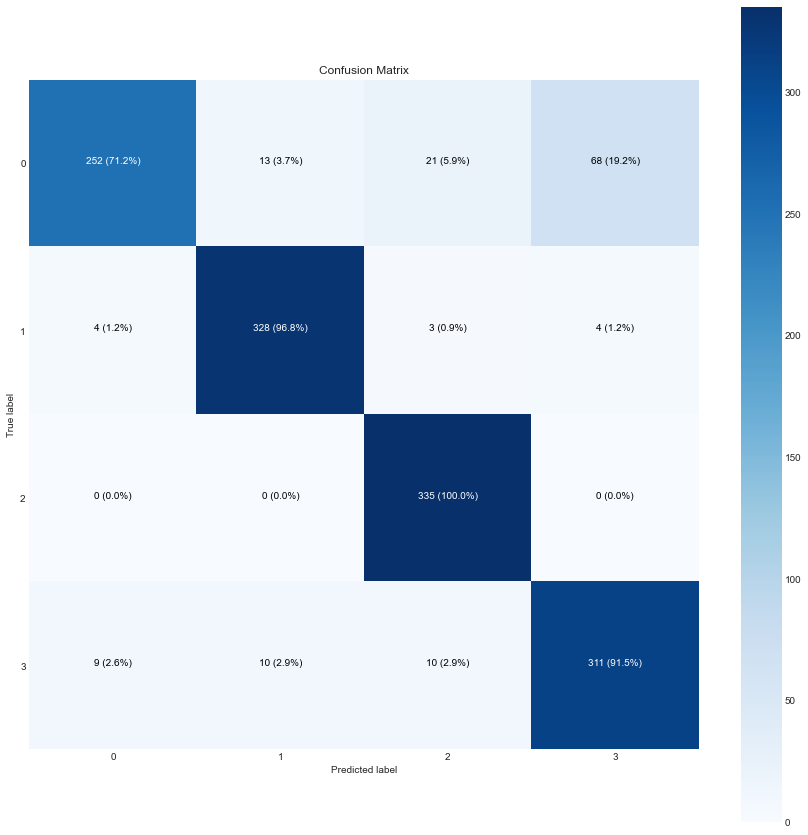

In [14]:
plt.style.use('seaborn-dark')
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      figsize=(15, 15),
                      text_size=10)

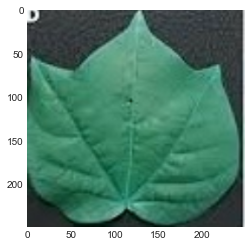

In [15]:
import cv2
img_array=cv2.imread('h19.jpg')
new_array = cv2.resize(img_array, (250,250))
k=np.array(new_array).reshape(-1,250,250,3)
k=k/255.0
plt.imshow(new_array)
plt.show()

In [16]:
pre=model.predict(k)
print(pre)
np.argmax(pre,axis=1)

1/1 [==============================] - 0s 33ms/step
[[0. 0. 0. 1.]]


array([3], dtype=int64)

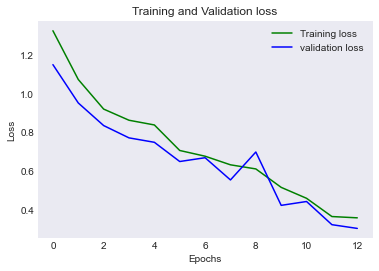

In [18]:
loss_train = model_history.history['loss']
loss_val = model_history.history['val_loss']
epochs = range(0,13)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

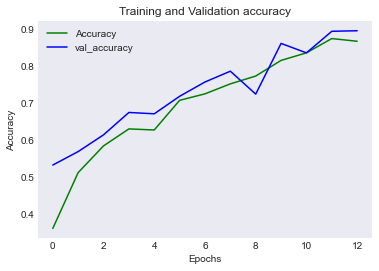

In [19]:
acc_train = model_history.history['accuracy']
acc_val = model_history.history['val_accuracy']
epochs = range(0,13)
plt.plot(epochs, acc_train, 'g', label='Accuracy')
plt.plot(epochs, acc_val, 'b', label='val_accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

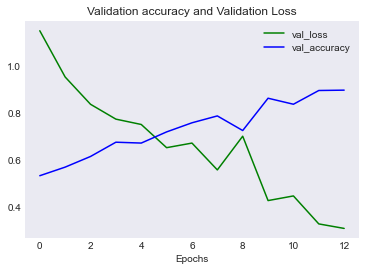

In [20]:
loss_train = model_history.history['val_loss']
loss_val = model_history.history['val_accuracy']
epochs = range(0,13)
plt.plot(epochs, loss_train, 'g', label='val_loss')
plt.plot(epochs, loss_val, 'b', label='val_accuracy')
plt.title('Validation accuracy and Validation Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81       354
         1.0       0.93      0.97      0.95       339
         2.0       0.91      1.00      0.95       335
         3.0       0.81      0.91      0.86       340

    accuracy                           0.90      1368
   macro avg       0.90      0.90      0.89      1368
weighted avg       0.90      0.90      0.89      1368

